
### Estados do Bubble Sort:
1. **Start**: Inicializa um novo ciclo de ordenação
2. **Compare**: Checa os elementos adjacentes
3. **Swap**: Troca os elementos caso estejam fora de ordem
4. **Check Flag**: Determina se houve ou não trocas no ciclo atual



In [ ]:
class TuringMachine:
    def __init__(self, tape):
        self.tape = tape.copy() + ['0']  #Faz uma cópia da fita adicionando um 0 ao final para indicar um flag de troca
        self.head = 0 # Posição inicial da cabeça de leitura
        self.state = 'start' #Estado inicial
        self.swap_flag_pos = len(self.tape) - 1 #Armazenar a posição do flag de troca
        self.history = []
        self.step_counter = 0

    def log_action(self, action): # Contador de passos e armazenamento de ações
        self.step_counter += 1
        self.history.append(f"Step {self.step_counter}: {action}")

    def step(self): # Se a maquina ja estiver parada, não faz nada
        if self.state == 'halt':
            return

        current_symbol = self.tape[self.head] if self.head < len(self.tape) else None

        if self.state == 'start': # Inicia a maquina na posição 0 resetando a cabeça de leitura
            action = f"START NEW PASS | Reset head to position 0"
            self.head = 0
            self.state = 'compare'
            self.log_action(action)

        elif self.state == 'compare': # Se a cabeça de leitura estiver no ultimo elemento, verifica se a ordenação foi concluida
            if self.head >= self.swap_flag_pos - 1:
                action = "Reached end of elements | Check swap flag"
                self.state = 'check_flag'
                self.log_action(action)
            else: #Compara o simbolo atual com o proximo
                next_symbol = self.tape[self.head + 1]
                if current_symbol > next_symbol: #Se o simbolo atual for maior que o proximo, a maquina entra no estado de troca
                    action = f"COMPARE [{current_symbol}↔{next_symbol}] at positions {self.head}-{self.head+1} | Need swap"
                    self.state = 'swap'
                    self.log_action(action)
                else: #Se o simbolo atual for menor que o proximo, a maquina avança para o proximo simbolo
                    action = f"COMPARE [{current_symbol}↔{next_symbol}] at positions {self.head}-{self.head+1} | No swap"
                    self.head += 1
                    if self.head >= self.swap_flag_pos - 1: #Se a cabeça de leitura estiver no ultimo elemento, transiciona para o estado de verificação do flag
                        self.state = 'check_flag'
                        action += " | Reached end"
                    self.log_action(action)

        elif self.state == 'swap': #Troca os elementos de posição caso necessário
            prev_val = self.tape[self.head]
            next_val = self.tape[self.head + 1]
            self.tape[self.head], self.tape[self.head + 1] = next_val, prev_val
            self.tape[self.swap_flag_pos] = '1' #Define o sinalizador de troca como '1', indicando que pelo menos uma troca ocorreu nesta passagem

            action = f"SWAP [{prev_val}⇄{next_val}] at positions {self.head}-{self.head+1} | "
            self.head += 1 #Move a cabeça de leitura para o proximo elemento
            action += f"Moved to position {self.head} | Set swap flag"

            if self.head >= self.swap_flag_pos - 1:  #Se a cabeça de leitura estiver no ultimo elemento, transiciona para o estado de verificação do flag
                self.state = 'check_flag'
                action += " | Reached end"
            else:
                self.state = 'compare'

            self.log_action(action)

        elif self.state == 'check_flag': # se o sinalizador de troca for 1, reinicia a maquina, caso contrario, a ordenação foi concluida
            if self.tape[self.swap_flag_pos] == '1':
                action = "CHECK FLAG [1] | Swaps occurred | Reset flag and restart"
                self.tape[self.swap_flag_pos] = '0'
                self.state = 'start'
            else: #Se o sinalizador de troca for 0, a ordenação foi concluida
                action = "CHECK FLAG [0] | No swaps | Sorting complete"
                self.state = 'halt'
            self.log_action(action)

    def run(self): #Executa a maquina ate que o estado seja 'halt'
        while self.state != 'halt':
            self.step()
        return self.tape[:-1], self.history

initial_elements = ['1', '4', '4','3','2']
tm = TuringMachine(initial_elements)
sorted_tape, history = tm.run()

print("Initial tape:", initial_elements)
print("Sorted tape:", sorted_tape)
print("Execution log:")
print('\n'.join(history))

Initial tape: ['1', '4', '4', '3', '2']
Sorted tape: ['1', '2', '3', '4', '4']
Execution log:
Step 1: START NEW PASS | Reset head to position 0
Step 2: COMPARE [1↔4] at positions 0-1 | No swap
Step 3: COMPARE [4↔4] at positions 1-2 | No swap
Step 4: COMPARE [4↔3] at positions 2-3 | Need swap
Step 5: SWAP [4⇄3] at positions 2-3 | Moved to position 3 | Set swap flag
Step 6: COMPARE [4↔2] at positions 3-4 | Need swap
Step 7: SWAP [4⇄2] at positions 3-4 | Moved to position 4 | Set swap flag | Reached end
Step 8: CHECK FLAG [1] | Swaps occurred | Reset flag and restart
Step 9: START NEW PASS | Reset head to position 0
Step 10: COMPARE [1↔4] at positions 0-1 | No swap
Step 11: COMPARE [4↔3] at positions 1-2 | Need swap
Step 12: SWAP [4⇄3] at positions 1-2 | Moved to position 2 | Set swap flag
Step 13: COMPARE [4↔2] at positions 2-3 | Need swap
Step 14: SWAP [4⇄2] at positions 2-3 | Moved to position 3 | Set swap flag
Step 15: COMPARE [4↔4] at positions 3-4 | No swap | Reached end
Step 16: CH

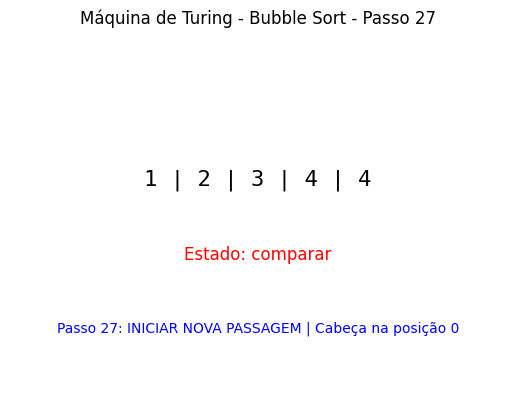

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

class MaquinaDeTuring:
    def __init__(self, fita):
        self.fita = [int(x) for x in fita] + [0]  #garantir que os valores sejam inteiros
        self.cabeca = 0
        self.estado = 'inicio'
        self.flag_troca = False  #flag para verificar se houve troca na passagem
        self.historico = []
        self.contador_passos = 0

    def registrar_acao(self, acao):
        self.contador_passos += 1
        self.historico.append(f"Passo {self.contador_passos}: {acao}")

    def passo(self):
        if self.estado == 'parado':
            return

        simbolo_atual = self.fita[self.cabeca]

        if self.estado == 'inicio':
            self.cabeca = 0
            self.flag_troca = False  # Reiniciar a flag de troca
            self.estado = 'comparar'
            self.registrar_acao("INICIAR NOVA PASSAGEM | Cabeça na posição 0")

        elif self.estado == 'comparar':
            if self.cabeca >= len(self.fita) - 2:  # Última posição válida
                self.estado = 'verificar_flag'
                self.registrar_acao("Chegou ao final | Verificar flag de troca")
            else:
                proximo_simbolo = self.fita[self.cabeca + 1]
                if simbolo_atual > proximo_simbolo:
                    self.estado = 'trocar'
                    self.registrar_acao(f"COMPARAR [{simbolo_atual} > {proximo_simbolo}] | Necessário trocar")
                else:
                    self.cabeca += 1
                    self.registrar_acao(f"COMPARAR [{simbolo_atual} ≤ {proximo_simbolo}] | Sem troca")

        elif self.estado == 'trocar':
            self.fita[self.cabeca], self.fita[self.cabeca + 1] = self.fita[self.cabeca + 1], self.fita[self.cabeca]
            self.flag_troca = True  # Marcar que houve troca
            self.registrar_acao(f"TROCAR [{self.fita[self.cabeca]} ⇄ {self.fita[self.cabeca+1]}] | Mover para {self.cabeca+1}")
            self.cabeca += 1
            self.estado = 'comparar'

        elif self.estado == 'verificar_flag':
            if self.flag_troca:
                self.estado = 'inicio'
                self.registrar_acao("Houve trocas | Iniciar nova passagem")
            else:
                self.estado = 'parado'
                self.registrar_acao("Ordenação concluída")

    def executar(self):
        while self.estado != 'parado':
            self.passo()
        return self.fita[:-1], self.historico  # Retorna a fita ordenada

# Definição da fita inicial
fita_inicial = ['1', '4', '4', '3', '2']
mt = MaquinaDeTuring(fita_inicial)
quadros = []

# Configuração da animação
fig, ax = plt.subplots()

def atualizar(frame):
    if mt.estado != 'parado':
        mt.passo()
    ax.clear()
    ax.set_title(f"Máquina de Turing - Bubble Sort - Passo {mt.contador_passos}")
    fita_str = ' | '.join(map(str, mt.fita[:-1]))
    estado_info = f"Estado: {mt.estado}"
    ax.text(0.5, 0.6, fita_str, ha='center', va='center', fontsize=16, family='monospace')
    ax.text(0.5, 0.4, estado_info, ha='center', va='center', fontsize=12, color='red')
    if mt.historico:
        ax.text(0.5, 0.2, mt.historico[-1], ha='center', va='center', fontsize=10, color='blue')
    ax.axis("off")
    quadros.append(fita_str)

# Criar animação com número de frames dinâmico
num_frames = len(fita_inicial) ** 2  # Aproximadamente n² passos no pior caso
animacao_mt = animation.FuncAnimation(fig, atualizar, frames=num_frames, interval=500, repeat=False)
HTML(animacao_mt.to_jshtml())


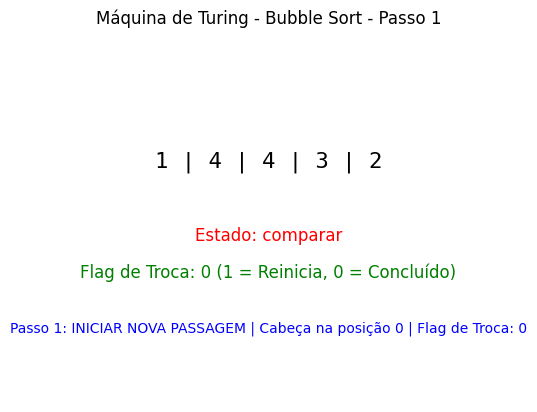

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

class MaquinaDeTuring:
    def __init__(self, fita):
        """
        Inicializa a Máquina de Turing com a fita de entrada.
        Converte os elementos da fita para inteiros e adiciona um espaço extra no final.
        """
        self.fita = [int(x) for x in fita] + [0]
        self.cabeca = 0  # Define a posição inicial da cabeça de leitura
        self.estado = 'inicio'  # Define o estado inicial da máquina
        self.flag_troca = 0  # Indica se houve troca na última passagem
        self.historico = []  # Registra o histórico de ações
        self.contador_passos = 0  # Contador de passos executados
        self.passos_executados = []  # Lista para armazenar os estados da fita para animação

    def registrar_acao(self, acao):
        """
        Registra uma ação da Máquina de Turing no histórico.
        Salva o estado atual da fita e da cabeça de leitura.
        """
        self.contador_passos += 1
        log = f"Passo {self.contador_passos}: {acao} | Flag de Troca: {self.flag_troca}"
        self.historico.append(log)
        self.passos_executados.append((self.fita[:], self.cabeca, self.estado, self.flag_troca, log))

    def passo(self):
        """
        Executa um único passo da Máquina de Turing.
        Realiza comparações, trocas e movimentação da cabeça de leitura.
        """
        if self.estado == 'parado':
            return

        simbolo_atual = self.fita[self.cabeca]  # Obtém o valor na posição atual da cabeça

        if self.estado == 'inicio':
            # Reinicia a passagem pela fita
            self.cabeca = 0
            self.flag_troca = 0
            self.estado = 'comparar'
            self.registrar_acao("INICIAR NOVA PASSAGEM | Cabeça na posição 0")

        elif self.estado == 'comparar':
            if self.cabeca >= len(self.fita) - 2:  # Se chegou ao final da fita
                self.estado = 'verificar_flag'
                self.registrar_acao("Chegou ao final | Verificar flag de troca")
            else:
                proximo_simbolo = self.fita[self.cabeca + 1]
                if simbolo_atual > proximo_simbolo:
                    # Identifica necessidade de troca
                    self.estado = 'trocar'
                    self.registrar_acao(f"COMPARAR [{simbolo_atual} > {proximo_simbolo}] | Necessário trocar")
                else:
                    # Move a cabeça para frente sem troca
                    self.cabeca += 1
                    self.registrar_acao(f"COMPARAR [{simbolo_atual} ≤ {proximo_simbolo}] | Sem troca")

        elif self.estado == 'trocar':
            # Troca os valores adjacentes
            self.fita[self.cabeca], self.fita[self.cabeca + 1] = self.fita[self.cabeca + 1], self.fita[self.cabeca]
            self.flag_troca = 1  # Marca que houve troca
            self.registrar_acao(f"TROCAR [{self.fita[self.cabeca]} ⇄ {self.fita[self.cabeca+1]}] | Mover para {self.cabeca+1}")
            self.cabeca += 1
            self.estado = 'comparar'

        elif self.estado == 'verificar_flag':
            if self.flag_troca == 1:
                # Se houve trocas, reinicia a ordenação
                self.estado = 'inicio'
                self.registrar_acao("Flag = 1: Houve trocas | Reiniciar máquina")
            else:
                # Se não houve trocas, a ordenação está concluída
                self.estado = 'parado'
                self.registrar_acao("Flag = 0: Ordenação concluída")

    def executar(self):
        """
        Executa a Máquina de Turing até que o estado seja 'parado'.
        Retorna a fita ordenada e o histórico de ações.
        """
        while self.estado != 'parado':
            self.passo()
        return self.fita[:-1], self.historico  # Retorna a fita ordenada e o histórico de ações

# Definição da fita inicial (números a serem ordenados)
fita_inicial = ['1', '4', '4', '3', '2']
mt = MaquinaDeTuring(fita_inicial)
mt.executar()
quadros = mt.passos_executados  # Armazena os quadros para a animação

# Configuração da animação
fig, ax = plt.subplots()

def atualizar(frame):
    """
    Atualiza o gráfico da animação para representar um quadro específico do processo.
    """
    fita, cabeca, estado, flag_troca, log = quadros[frame]
    ax.clear()
    ax.set_title(f"Máquina de Turing - Bubble Sort - Passo {frame+1}")

    # Representação da fita como string
    fita_str = ' | '.join(map(str, fita[:-1]))
    estado_info = f"Estado: {estado}"
    flag_info = f"Flag de Troca: {flag_troca} (1 = Reinicia, 0 = Concluído)"

    # Exibição de informações na animação
    ax.text(0.5, 0.65, fita_str, ha='center', va='center', fontsize=16, family='monospace')
    ax.text(0.5, 0.45, estado_info, ha='center', va='center', fontsize=12, color='red')
    ax.text(0.5, 0.35, flag_info, ha='center', va='center', fontsize=12, color='green')
    ax.text(0.5, 0.2, log, ha='center', va='center', fontsize=10, color='blue')


    #x_pos = 0.28 + cabeca * 0.1  # Calcula a posição X da seta na tela
    #ax.annotate('↓', (x_pos, 0.75), textcoords="offset points", xytext=(0, 10), ha='center', fontsize=20, color='purple')

    ax.axis("off")

# Criar animação com base no número real de passos
num_frames = len(quadros)
animacao_mt = animation.FuncAnimation(fig, atualizar, frames=num_frames, interval=500, repeat=False)
HTML(animacao_mt.to_jshtml())


## 2. Tabela de transição

| Estado Atual | Simbolo lido | Proximo estado  | Simbolo escrito | Direção do movimento | Descrição      |
|--------------|------------|-------------|--------------|---------------|----------------------------|
| Inicio        | *          | Comparação     | *         | Direita             | Começo de um novo ciclo             |
| Comparação      | a          | Comparação     | a            | Direita             | a ≤ próximo elemento           |
| Comparação      | a          | Troca        | a            | -             | a > próximo elemento           |
| Troca         | a          | Comparação     | b            | Direita             | Troca a↔b, alteração da flag         |
| Comparação      | ☐         | Checar_flag  | ☐           | Esquerda             | Fim da lista           |
| Checar_flag   | 0          | Fim        | 0            | -             | Sem trocas → Ordenado         |
| Checar_flag   | 1          | Inicio       | 0            | Esquerda             | Resetar flag → novo ciclo     |

### Quando:
- `a, b` ∈ alfabeto de entrada (digitos 0-9)
- `☐` = simbolo em branco (marcador de final)
- `R / L` = Movimento para direita / esquerda


Passo | Estado       | Fita (Posição da cabeça)       | Ação
-----|-------------|-----------------------------|---------------------------
1    | Inicio       | [3̲,1,2,4,0]                 | Reseta cabeça de leitura
2    | Compara     | [3̲,1,2,4,0]                 | Compara 3 > 1 → Troca
3    | Troca        | [1̲,3,2,4,1]                 | Troca completa
4    | Compara     | [1,3̲,2,4,1]                 | Compara 3 > 2 → Troca
5    | Troca        | [1,2̲,3,4,1]                 | Troca completa
6    | Compara     | [1,2,3̲,4,1]                 | Compara 3 < 4 → Move
7    | Checar flag  | [1,2,3,4,1̲]                | Flag=1 → Novo ciclo
8    | Inicio       | [1̲,2,3,4,0]                 | Reseta para o novo ciclo
9    | Compara     | [1̲,2,3,4,0]                 | Todos os elementos ordenados → fim

## 3. Definição formal

```python
TM = (Q, Σ, Γ, δ, q₀, q_accept)
Q (Estados): {start, compare, swap, check_flag, halt}
Σ (Alfabeto de entrada): {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
Γ (Alfabeto da fita): Σ ∪ {0, 1, ☐} (Includes swap flags)
δ (Funções de transição): definido na tabela de transição
q₀ (Estado inicial): start
q_accept: Fim


# Exemplos:


q0 (Inicio da fita) → Move a cabeça de leitura para o primeiro elemento da fita.

q1 (Compara elementos adjacentes) → Compara e troca caso necessário.

q2 (Troca de elementos) → Realiza a troca da posição dos elementos.

q3 (Checa o final da fita) → Checa se a ordenação foi concluída. Caso tenha ocorrido alguma troca, reiniciar a fita para verificação.

q4 (Fim) → Ordenação finalizada.

In [ ]:
from graphviz import Digraph

def plot_dfa():
    dfa = Digraph("Turing Machine DFA", format="png")
    dfa.attr(rankdir="LR")

    # States
    states = ["Inicio(q0)", "Comparacao(q1)", "Troca(q2)", "Checar_flag(q3)", "Fim(q_accepted)"]
    final_state = "Fim(q_accepted)"

    for state in states:
        if state == final_state:
            dfa.node(state, shape="doublecircle")
        else:
            dfa.node(state, shape="circle")

    transitions = [
        ("Inicio(q0)", "Comparacao(q1)", "(*,* , →)"),
        ("Comparacao(q1)", "Comparacao(q1)", "(a, a, →) (a ≤ próximo)"),
        ("Comparacao(q1)", "Troca(q2)", "(a, a, -) (a > próximo)"),
        ("Troca(q2)", "Comparacao(q1)", "(a, b, →) (troca a⇄b)"),
        ("Comparacao(q1)", "Checar_flag(q3)", "(□, □, ←) (fim da lista)"),
        ("Checar_flag(q3)", "Fim(q_accepted)", "(0, 0, -) (ordenado)"),
        ("Checar_flag(q3)", "Inicio(q0)", "(1, 0, ←) (reset flag)"),
    ]

    for from_state, to_state, label in transitions:
        dfa.edge(from_state, to_state, label)

    # Render the DFA
    dfa.render("dfa_turing_machine", view=True)

plot_dfa()


## Exemplo 1 - Tabela de transição

| Estado Atual | Simbolo lido|Próximo estado| Simbolo escrito | Direção do movimento | Condição      |
|--------------|------------|-------------|--------------|---------------|----------------------------|
| q0           | 3          | q1          | 3            | Direita       | Movimenta para o próximo   |
| q1           | 2          | q2          | 2            | Esquerda      | Troca necessária           |
| q2           | 3          | q2          | 2            | Direita       | Troca para a esquerda      |
| q2           | 2          | q1          | 3            | Direta        | Troca para a direita       |
| q1           | 1          | q2          | 1            | Esquerda      | Troca necessária           |
| q2           | 3          | q2          | 1            | Direita       | Troca para a esquerda      |
| q2           | 1          | q1          | 3            | Direita       | Troca para a Direta        |
| q1           | _          | q3          | _            | Esquerda       | Fim da fita, checar flag de troca|
| q3           | X          | q0          | X            | Esquerda      | Reiniciar se houver alguma troca|
| q3           | _          | q4          | _            | -             | Fim da ordenação           |

In [ ]:
#['3', '2', '1']
from graphviz import Digraph

# Define Turing Machine Transitions for ['3', '2', '1']
transitions = {
    ('q0', '3'): ('3', 'R', 'q1'),
    ('q1', '2'): ('2', 'L', 'q2'),
    ('q2', '3'): ('2', 'R', 'q2'),
    ('q2', '2'): ('3', 'R', 'q1'),
    ('q1', '1'): ('1', 'L', 'q2'),
    ('q2', '3'): ('1', 'R', 'q2'),
    ('q2', '1'): ('3', 'R', 'q1'),
    ('q1', '_'): ('_', 'L', 'q3'),
    ('q3', 'X'): ('X', 'L', 'q0'),
    ('q3', '_'): ('_', 'R', 'q4')
}

# Plot the DFA Representation
def plot_turing_dfa():
    dfa = Digraph("TuringSorting", format="png")

    # Define states
    states = ["q0", "q1", "q2", "q3", "q4"]
    initial_state = "q0"
    final_state = "q4"

    # Add nodes (states)
    for state in states:
        if state == final_state:
            dfa.node(state, shape="doublecircle", style="filled", fillcolor="lightgray")  # Final state
        else:
            dfa.node(state, shape="circle")

    # Add transitions from Turing Machine table
    for (state, read_symbol), (write_symbol, move, next_state) in transitions.items():
        dfa.edge(state, next_state, f"{read_symbol}, {write_symbol}, {move}")

    # Save and render the DFA diagram
    dfa.render("turing_sorting_dfa_321", view=True)

# Run the visualization
plot_turing_dfa()


## Exemplo 2 Tabela de transição
| Estado Atual | Simbolo lido|Próximo estado| Simbolo escrito | Direção do movimento | Condição      |
|--------------|------------|-------------|--------------|---------------|----------------------------|
| q0           | 3          | q1          | 3            | Direita       | Movimenta para o próximo   |
| q1           | 2          | q2          | 2            | Esquerda      | Troca necessária           |
| q2           | 3          | q2          | 2            | Direita       | Troca para a esquerda      |
| q2           | 2          | q1          | 3            | Direta        | Troca para a direita       |
| q1           | 1          | q2          | 1            | Esquerda      | Troca necessária           |
| q2           | 3          | q2          | 1            | Direita       | Troca para a esquerda      |
| q2           | 1          | q1          | 3            | Direita       | Troca para a Direta        |
| q2           | 4          | q1          | 4            | Direita       | Sem trocas                   |
| q1           | _          | q3          | _            | Esquerda       | Fim da fita, checar flag de troca|
| q3           | X          | q0          | X            | Esquerda      | Reiniciar se houver alguma troca|
| q3           | _          | q4          | _            | -             | Fim da ordenação           |

In [ ]:
# ['3', '2', '1', '4']
from graphviz import Digraph

# Define Turing Machine Transitions for ['3', '2', '1', '4']
transitions = {
    ('q0', '3'): ('3', 'R', 'q1'),
    ('q1', '2'): ('2', 'L', 'q2'),
    ('q2', '3'): ('2', 'R', 'q2'),
    ('q2', '2'): ('3', 'R', 'q1'),
    ('q1', '1'): ('1', 'L', 'q2'),
    ('q2', '3'): ('1', 'R', 'q2'),
    ('q2', '1'): ('3', 'R', 'q1'),
    ('q1', '4'): ('4', 'R', 'q1'),
    ('q1', '_'): ('_', 'L', 'q3'),
    ('q3', 'X'): ('X', 'L', 'q0'),
    ('q3', '_'): ('_', 'R', 'q4')
}

# Plot the DFA Representation
def plot_turing_dfa():
    dfa = Digraph("TuringSorting", format="png")

    # Define states
    states = ["q0", "q1", "q2", "q3", "q4"]
    initial_state = "q0"
    final_state = "q4"

    # Add nodes (states)
    for state in states:
        if state == final_state:
            dfa.node(state, shape="doublecircle", style="filled", fillcolor="lightgray")  # Final state
        else:
            dfa.node(state, shape="circle")

    # Add transitions from Turing Machine table
    for (state, read_symbol), (write_symbol, move, next_state) in transitions.items():
        dfa.edge(state, next_state, f"{read_symbol},{write_symbol},{move}")

    # Save and render the DFA diagram
    dfa.render("turing_sorting_dfa_3214", view=True)

# Run the visualization
plot_turing_dfa()


## Exemplo 3 Tabela de transição

| Estado Atual | Simbolo lido|Próximo estado| Simbolo escrito | Direção do movimento | Condição      |
|--------------|------------|-------------|--------------|---------------|----------------------------|
| q0           | 1          | q1          | 1            | Direita       | Movimenta para o próximo   |
| q1           | 4          | q1          | 4            | Direita       | Compara com o próximo      |
| q1           | 4          | q1          | 4            | Direita       | Compara com o próximo      |
| q1           | 3          | q2          | 3            | Esquerda      | Troca para a esquerda      |
| q2           | 3          | q1          | 4            | Direita       | Troca para a direita       |
| q1           | 2          | q2          | 2            | Esquerda      | Troca                      |
| q2           | 4          | q2          | 2            | Direita       | Troca para a esquerda      |
| q2           | 2          | q1          | 4            | Direita       | Troca para a direita       |
| q1           | _          | q3          | _            | Esquerda      | Fim da fita, checar flag de troca|
| q3           | X          | q0          | X            | Esquerda      | Reiniciar se houver alguma troca|
| q3           | _          | q4          | _            | -             | Fim da ordenação           |

In [ ]:
#[1, 4, 4, 3, 2]
from graphviz import Digraph

# Define Turing Machine Transitions
transitions = {
    ('q0', '1'): ('1', 'R', 'q1'),
    ('q1', '4'): ('4', 'R', 'q1'),
    ('q1', '4'): ('4', 'R', 'q1'),
    ('q1', '3'): ('3', 'L', 'q2'),
    ('q2', '4'): ('3', 'R', 'q2'),
    ('q2', '3'): ('4', 'R', 'q1'),
    ('q1', '2'): ('2', 'L', 'q2'),
    ('q2', '4'): ('2', 'R', 'q2'),
    ('q2', '2'): ('4', 'R', 'q1'),
    ('q1', '_'): ('_', 'L', 'q3'),
    ('q3', 'X'): ('X', 'L', 'q0'),
    ('q3', '_'): ('_', 'R', 'q4')
}

# Plot the DFA Representation
def plot_turing_dfa():
    dfa = Digraph("TuringSorting", format="png")

    # Define states
    states = ["q0", "q1", "q2", "q3", "q4"]
    initial_state = "q0"
    final_state = "q4"

    # Add nodes (states)
    for state in states:
        if state == final_state:
            dfa.node(state, shape="doublecircle", style="filled", fillcolor="lightgray")  # Final state
        else:
            dfa.node(state, shape="circle")

    # Add transitions from Turing Machine table
    for (state, read_symbol), (write_symbol, move, next_state) in transitions.items():
        dfa.edge(state, next_state, f"{read_symbol},  {write_symbol},{move}")

    # Save and render the DFA diagram
    dfa.render("turing_sorting_dfa14432", view=True)

# Run the visualization
plot_turing_dfa()
